# Network Analysis

To identify which sub-networks i.e. communities, are of interest, we'll calculate the correlation between the networks and the
relevant clinical metadata variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests
import pickle
import seaborn as sns

Read in required data

In [2]:
#Load in the required data
datExpr = pd.read_csv('/shared/as8020/recode/Bcell_datExpr_pseudobulk.csv', index_col = 0)
metadata = pd.read_csv('/shared/as8020/recode/Bcell_metadata_pseudobulk.csv', index_col = 0)

In [3]:
datExpr

,ISG15,LINC01342,TTLL10-AS1,TNFRSF18,CALML6,CHD5,ICMT-DT,MIR34AHG,RBP7,MTOR-AS1,...,FRMPD3,TSC22D3,KLHL13,AKAP14,RHOXF1-AS1,TMEM255A,SMIM10L2B-AS1,IL9R_ENSG00000124334,DDX3Y,EIF1AY
donor_id,,,,,,,,,,,,,,,,,,,,,
CH-20-001,6.380902,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,53.239480,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,21.632603,17.641195
CH-20-002,12.606751,2.33599,0.000000,0.000000,0.00000,0.000000,1.089918,0.000000,1.158743,1.173824,...,0.000000,112.643970,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,45.432410,22.809190
CH-20-004,12.302510,0.00000,0.000000,21.512184,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,42.873410,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,15.570595,20.173725
CH-20-005,18.603716,1.16925,1.232658,4.975880,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.112746,190.337740,0.000000,0.0000,1.191559,0.000000,0.000000,0.000000,6.931139,1.071742
CH-21-002,13.705297,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,44.942260,0.000000,0.0000,0.000000,0.000000,0.000000,1.323198,0.000000,0.000000
CH-21-006,4.377715,0.00000,0.000000,23.782143,0.00000,0.000000,0.000000,0.000000,1.023552,0.000000,...,0.000000,12.741602,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,5.349793,12.981407
CH-21-008,18.058025,0.00000,0.000000,44.614340,0.00000,1.201673,0.000000,0.000000,0.000000,0.000000,...,0.000000,76.893720,0.000000,0.0000,0.000000,0.000000,0.000000,1.080360,1.188176,2.377049
CH-21-013,21.395964,0.00000,0.000000,30.426510,0.00000,0.000000,1.235703,0.000000,0.000000,0.000000,...,0.000000,54.458330,0.000000,0.0000,0.000000,0.000000,1.117969,1.236817,23.543072,53.250420
CH-21-014,13.436963,0.00000,0.000000,11.067089,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,32.248600,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,17.709280,21.636190


In [4]:
metadata

,nCount_RNA,nFeature_RNA,donor_id.1,MUTATION,percent.mt,scType_celltype,tissue_type,cell_type,tissue,development_stage,male,female,CH,normal,DNMT3A,TET2,NoMutation
donor_id,,,,,,,,,,,,,,,,,
CH-20-001,2490.0,1403,CH-20-001,DNMT3A R882C,6.119578,Naive B cells,tissue,B cell,blood,60,1,0,1,0,1,0,0
CH-20-002,1192.0,629,CH-20-002,"DNMT3A R729W (4%), DNMT3A R736C (2%)",3.803975,Naive B cells,tissue,B cell,blood,68,1,0,1,0,1,0,0
CH-20-004,1833.0,985,CH-20-004,"TET2 R1516X (30%), TET2 Q659X (29%), SRSF2 P95...",5.335196,Naive B cells,tissue,B cell,blood,85,1,0,1,0,0,1,0
CH-20-005,1966.0,886,CH-20-005,TET2 V1900F (2%),5.314136,Naive B cells,tissue,B cell,blood,58,0,1,1,0,0,1,0
CH-21-002,1912.0,938,CH-21-002,none,5.657238,Naive B cells,tissue,B cell,blood,48,0,1,0,1,0,0,1
CH-21-006,1356.0,709,CH-21-006,DNMT3A R882H (13%),5.211849,Naive B cells,tissue,B cell,blood,67,0,1,1,0,1,0,0
CH-21-008,1117.0,575,CH-21-008,none,8.398348,Naive B cells,tissue,B cell,blood,70,0,1,0,1,0,0,1
CH-21-013,1321.0,816,CH-21-013,none,4.663212,Naive B cells,tissue,B cell,blood,73,1,0,0,1,0,0,1
CH-21-014,1064.0,623,CH-21-014,"SRSF2 P95R (40%), TET2 L957Ifs*15 (51%)",4.146577,Naive B cells,tissue,B cell,blood,74,1,0,1,0,0,1,0


In [5]:
gene_names = datExpr.columns
gene_names

Index(['ISG15', 'LINC01342', 'TTLL10-AS1', 'TNFRSF18', 'CALML6', 'CHD5',
       'ICMT-DT', 'MIR34AHG', 'RBP7', 'MTOR-AS1',
       ...
       'FRMPD3', 'TSC22D3', 'KLHL13', 'AKAP14', 'RHOXF1-AS1', 'TMEM255A',
       'SMIM10L2B-AS1', 'IL9R_ENSG00000124334', 'DDX3Y', 'EIF1AY'],
      dtype='object', length=1000)

In [6]:
with open('/shared/as8020/recode/dataset2/separated_communities.pkl', 'rb') as file:
        separated_communities = pickle.load(file)

In [7]:
print(separated_communities)

[['NKX6-3', 'ZC2HC1B', 'ZSCAN10', 'HCG9', 'CC2D2B', 'DBX2', 'MOBP', 'STAP2', 'LCN2', 'ZNF462', 'TMEM72-AS1', 'LNCOC1', 'SLC28A2', 'SLC10A5', 'SRRM5', 'SLC17A7', 'OPA1-AS1', 'DEPDC7', 'LIN28A', 'SLC6A3', 'GJB6', 'TMEM255A', 'IGLC4', 'LINC00640', 'DENND6A-AS1', 'FNDC5', 'LAMA2', 'CYYR1', 'CNKSR3', 'RNF182', 'TECTA', 'KRT2', 'PRRT3-AS1', 'LINC02267', 'MUCL3', 'CFAP99', 'CCNA1', 'SLC26A8', 'GNG12', 'PHACTR3', 'LINC01133', 'C21orf62', 'ANKRD29', 'NGFR', 'NKD2', 'GJC2', 'LIM2', 'ANO1', 'LINC00997', 'STARD6', 'ARHGAP23', 'HYDIN', 'KLHL13', 'IGLV5-37', 'PLSCR2', 'TDRP', 'REG1A', 'LINC01832', 'ARHGEF39', 'CDH6', 'LINC01891', 'MGAM', 'AKAP14', 'TDRD1', 'PRLR', 'RARRES2', 'SLC2A4', 'OR2B11', 'DTNA', 'PTGES'], ['ACTN3', 'PDK4-AS1', 'C10orf105', 'ACVR2B-AS1', 'LINC02348', 'DPYD-IT1', 'UBE2Q2P16', 'PRKD3-DT', 'LINC01986', 'CALML6', 'EPHB2', 'PAPPA-AS1', 'DLGAP2', 'MROH8', 'RAB6C', 'ZNF503', 'H3C8', 'LINC02569', 'CDC42EP1', 'TFAP2A', 'ESCO2', 'WNT3A', 'SLC12A3', 'RGPD6', 'ICA1-AS1', 'FOXD3', 'LINC026

# Step 1: Module Eigengene Calculation

Module eigengene calculation is a concept used in the analysis of gene expression data.

Module/sub-network: A module refers to a group of genes that exhibit similar expression patterns across samples. Modules are often identified using clustering algorithms applied to gene expression data.

Eigengene: An eigengene represents the overall expression profile of a module. It is calculated as the first principal component of the gene expression profiles within the module. Essentially, the eigengene captures the main axis of variation or the common expression pattern shared by the genes within the module.

We will be using module eigengenes as representations for further downstream analysis.

In [8]:
# Initialise a DataFrame to store module eigengenes
module_eigengenes = pd.DataFrame(index=datExpr.index)

# Calculate the module eigengene for each community
for i, community in enumerate(separated_communities):
    community_genes = [gene for gene in community if gene in gene_names]
    if community_genes:
        community_expr = datExpr[community_genes]
        pca = PCA(n_components=1)
        eigengene = pca.fit_transform(community_expr)
        module_eigengenes[f'Module_{i+1}'] = eigengene[:, 0]

In [9]:
metadata

,nCount_RNA,nFeature_RNA,donor_id.1,MUTATION,percent.mt,scType_celltype,tissue_type,cell_type,tissue,development_stage,male,female,CH,normal,DNMT3A,TET2,NoMutation
donor_id,,,,,,,,,,,,,,,,,
CH-20-001,2490.0,1403,CH-20-001,DNMT3A R882C,6.119578,Naive B cells,tissue,B cell,blood,60,1,0,1,0,1,0,0
CH-20-002,1192.0,629,CH-20-002,"DNMT3A R729W (4%), DNMT3A R736C (2%)",3.803975,Naive B cells,tissue,B cell,blood,68,1,0,1,0,1,0,0
CH-20-004,1833.0,985,CH-20-004,"TET2 R1516X (30%), TET2 Q659X (29%), SRSF2 P95...",5.335196,Naive B cells,tissue,B cell,blood,85,1,0,1,0,0,1,0
CH-20-005,1966.0,886,CH-20-005,TET2 V1900F (2%),5.314136,Naive B cells,tissue,B cell,blood,58,0,1,1,0,0,1,0
CH-21-002,1912.0,938,CH-21-002,none,5.657238,Naive B cells,tissue,B cell,blood,48,0,1,0,1,0,0,1
CH-21-006,1356.0,709,CH-21-006,DNMT3A R882H (13%),5.211849,Naive B cells,tissue,B cell,blood,67,0,1,1,0,1,0,0
CH-21-008,1117.0,575,CH-21-008,none,8.398348,Naive B cells,tissue,B cell,blood,70,0,1,0,1,0,0,1
CH-21-013,1321.0,816,CH-21-013,none,4.663212,Naive B cells,tissue,B cell,blood,73,1,0,0,1,0,0,1
CH-21-014,1064.0,623,CH-21-014,"SRSF2 P95R (40%), TET2 L957Ifs*15 (51%)",4.146577,Naive B cells,tissue,B cell,blood,74,1,0,1,0,0,1,0


Lets tidy up the metadata dataframe further to only the columns needed for this analysis.

In [10]:
metadata2 = metadata.drop(columns=['donor_id.1','scType_celltype', 'tissue_type','cell_type', 'tissue', 'MUTATION'])

In [11]:
metadata2

,nCount_RNA,nFeature_RNA,percent.mt,development_stage,male,female,CH,normal,DNMT3A,TET2,NoMutation
donor_id,,,,,,,,,,,
CH-20-001,2490.0,1403,6.119578,60,1,0,1,0,1,0,0
CH-20-002,1192.0,629,3.803975,68,1,0,1,0,1,0,0
CH-20-004,1833.0,985,5.335196,85,1,0,1,0,0,1,0
CH-20-005,1966.0,886,5.314136,58,0,1,1,0,0,1,0
CH-21-002,1912.0,938,5.657238,48,0,1,0,1,0,0,1
CH-21-006,1356.0,709,5.211849,67,0,1,1,0,1,0,0
CH-21-008,1117.0,575,8.398348,70,0,1,0,1,0,0,1
CH-21-013,1321.0,816,4.663212,73,1,0,0,1,0,0,1
CH-21-014,1064.0,623,4.146577,74,1,0,1,0,0,1,0


In [12]:
# Merge module eigengenes with metadata
merged_data = pd.concat([metadata2, module_eigengenes], axis=1)

In [13]:
merged_data

,nCount_RNA,nFeature_RNA,percent.mt,development_stage,male,female,CH,normal,DNMT3A,TET2,...,Module_9,Module_10,Module_11,Module_12,Module_13,Module_14,Module_15,Module_16,Module_17,Module_18
donor_id,,,,,,,,,,,,,,,,,,,,,
CH-20-001,2490.0,1403,6.119578,60,1,0,1,0,1,0,...,-0.188323,-0.138498,-0.119332,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642
CH-20-002,1192.0,629,3.803975,68,1,0,1,0,1,0,...,-0.188323,-0.138498,-0.119332,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642
CH-20-004,1833.0,985,5.335196,85,1,0,1,0,0,1,...,-0.188323,-0.138498,-0.119332,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642
CH-20-005,1966.0,886,5.314136,58,0,1,1,0,0,1,...,-0.188323,-0.138498,-0.119332,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642
CH-21-002,1912.0,938,5.657238,48,0,1,0,1,0,0,...,-0.188323,-0.138498,-0.119332,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642
CH-21-006,1356.0,709,5.211849,67,0,1,1,0,1,0,...,-0.188323,-0.138498,-0.119332,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642
CH-21-008,1117.0,575,8.398348,70,0,1,0,1,0,0,...,-0.188323,-0.138498,-0.119332,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642
CH-21-013,1321.0,816,4.663212,73,1,0,0,1,0,0,...,-0.188323,-0.138498,-0.119332,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642
CH-21-014,1064.0,623,4.146577,74,1,0,1,0,0,1,...,-0.188323,-0.138498,2.744634,-0.107626,-0.108107,-0.094242,-0.084411,-0.085366,-0.066741,-0.070642


In [14]:
# Calculate Pearson correlation between module eigengenes and metadata
correlation_matrix2 = merged_data.corr(method='pearson')

In [15]:
correlation_matrix2

,nCount_RNA,nFeature_RNA,percent.mt,development_stage,male,female,CH,normal,DNMT3A,TET2,...,Module_9,Module_10,Module_11,Module_12,Module_13,Module_14,Module_15,Module_16,Module_17,Module_18
nCount_RNA,1.000000,0.984470,-0.036198,-0.104184,0.221317,-0.221317,-0.079895,0.079895,-0.118003,0.044151,...,0.787767,-0.062271,-0.215561,-0.072632,-0.068158,0.166368,0.166368,0.368870,-0.091234,-0.154810
nFeature_RNA,0.984470,1.000000,-0.046930,-0.064074,0.284235,-0.284235,-0.070985,0.070985,-0.094982,0.029101,...,0.737328,-0.040462,-0.219377,-0.035284,-0.079582,0.191379,0.191379,0.368568,-0.067501,-0.170477
percent.mt,-0.036198,-0.046930,1.000000,-0.450374,-0.403977,0.403977,-0.205453,0.205453,0.208230,-0.411947,...,0.046851,0.182254,-0.174404,-0.313359,0.109875,-0.209733,-0.209733,-0.125638,0.211302,-0.296327
development_stage,-0.104184,-0.064074,-0.450374,1.000000,0.368332,-0.368332,-0.045963,0.045963,-0.261424,0.224159,...,-0.158508,-0.336576,0.051937,0.197629,0.294757,0.327133,0.327133,0.003373,0.116689,-0.012816
male,0.221317,0.284235,-0.403977,0.368332,1.000000,-1.000000,0.260360,-0.260360,0.066667,0.182574,...,0.161515,-0.269191,0.161515,0.161515,-0.269191,0.161515,0.161515,0.161515,-0.269191,0.161515
female,-0.221317,-0.284235,0.403977,-0.368332,-1.000000,1.000000,-0.260360,0.260360,-0.066667,-0.182574,...,-0.161515,0.269191,-0.161515,-0.161515,0.269191,-0.161515,-0.161515,-0.161515,0.269191,-0.161515
CH,-0.079895,-0.070985,-0.205453,-0.045963,0.260360,-0.260360,1.000000,-1.000000,0.497050,0.453743,...,-0.324946,0.133801,0.133801,-0.324946,-0.324946,0.133801,0.133801,0.133801,-0.324946,0.133801
normal,0.079895,0.070985,0.205453,0.045963,-0.260360,0.260360,-1.000000,1.000000,-0.497050,-0.453743,...,0.324946,-0.133801,-0.133801,0.324946,0.324946,-0.133801,-0.133801,-0.133801,0.324946,-0.133801
DNMT3A,-0.118003,-0.094982,0.208230,-0.261424,0.066667,-0.066667,0.497050,-0.497050,1.000000,-0.547723,...,-0.161515,0.269191,-0.161515,-0.161515,-0.161515,0.269191,0.269191,-0.161515,-0.161515,-0.161515
TET2,0.044151,0.029101,-0.411947,0.224159,0.182574,-0.182574,0.453743,-0.453743,-0.547723,1.000000,...,-0.147442,-0.147442,0.294884,-0.147442,-0.147442,-0.147442,-0.147442,0.294884,-0.147442,0.294884


In [16]:
#The correlation matrix needs to be reformatted into the correct format:
correlation_matrix3 = correlation_matrix2.drop(['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'development_stage', 
                                               'male', 'female', 'CH', 'normal', 'DNMT3A', 'TET2', 'NoMutation'])

In [17]:
correlation_matrix3

,nCount_RNA,nFeature_RNA,percent.mt,development_stage,male,female,CH,normal,DNMT3A,TET2,...,Module_9,Module_10,Module_11,Module_12,Module_13,Module_14,Module_15,Module_16,Module_17,Module_18
Module_1,0.056404,0.076897,0.052741,0.165253,0.161515,-0.161515,0.133801,-0.133801,-0.161515,0.294884,...,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_2,0.047221,0.039503,-0.409359,0.197629,-0.269191,0.269191,0.133801,-0.133801,-0.161515,0.294884,...,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_3,-0.203081,-0.246991,0.459308,-0.012816,-0.269191,0.269191,-0.324946,0.324946,-0.161515,-0.147442,...,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_4,-0.185421,-0.215925,-0.225468,-0.045192,0.161515,-0.161515,0.133801,-0.133801,0.269191,-0.147442,...,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_5,-0.155046,-0.108346,-0.097401,0.035749,0.161515,-0.161515,-0.324946,0.324946,-0.161515,-0.147442,...,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_6,0.007192,-0.017450,0.390600,-0.514644,-0.269191,0.269191,0.133801,-0.133801,0.269191,-0.147442,...,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_7,-0.023419,-0.029531,0.179335,-0.093756,0.161515,-0.161515,0.133801,-0.133801,0.269191,-0.147442,...,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_8,-0.003169,-0.068076,-0.000384,-0.207072,-0.269191,0.269191,0.133801,-0.133801,-0.161515,0.294884,...,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_9,0.787767,0.737328,0.046851,-0.158508,0.161515,-0.161515,-0.324946,0.324946,-0.161515,-0.147442,...,1.000000,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478
Module_10,-0.062271,-0.040462,0.182254,-0.336576,-0.269191,0.269191,0.133801,-0.133801,0.269191,-0.147442,...,-0.043478,1.000000,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478,-0.043478


In [18]:
correlation_matrix3 = correlation_matrix3.drop(correlation_matrix3.columns[11:], axis=1)

In [19]:
correlation_matrix3

,nCount_RNA,nFeature_RNA,percent.mt,development_stage,male,female,CH,normal,DNMT3A,TET2,NoMutation
Module_1,0.056404,0.076897,0.052741,0.165253,0.161515,-0.161515,0.133801,-0.133801,-0.161515,0.294884,-0.133801
Module_2,0.047221,0.039503,-0.409359,0.197629,-0.269191,0.269191,0.133801,-0.133801,-0.161515,0.294884,-0.133801
Module_3,-0.203081,-0.246991,0.459308,-0.012816,-0.269191,0.269191,-0.324946,0.324946,-0.161515,-0.147442,0.324946
Module_4,-0.185421,-0.215925,-0.225468,-0.045192,0.161515,-0.161515,0.133801,-0.133801,0.269191,-0.147442,-0.133801
Module_5,-0.155046,-0.108346,-0.097401,0.035749,0.161515,-0.161515,-0.324946,0.324946,-0.161515,-0.147442,0.324946
Module_6,0.007192,-0.017450,0.390600,-0.514644,-0.269191,0.269191,0.133801,-0.133801,0.269191,-0.147442,-0.133801
Module_7,-0.023419,-0.029531,0.179335,-0.093756,0.161515,-0.161515,0.133801,-0.133801,0.269191,-0.147442,-0.133801
Module_8,-0.003169,-0.068076,-0.000384,-0.207072,-0.269191,0.269191,0.133801,-0.133801,-0.161515,0.294884,-0.133801
Module_9,0.787767,0.737328,0.046851,-0.158508,0.161515,-0.161515,-0.324946,0.324946,-0.161515,-0.147442,0.324946
Module_10,-0.062271,-0.040462,0.182254,-0.336576,-0.269191,0.269191,0.133801,-0.133801,0.269191,-0.147442,-0.133801


We now need to calculate the p-values for the correlations on the merged data.

In [20]:
# Initialise an empty DataFrame to store p-values
module_p_values = pd.DataFrame(index=module_eigengenes.columns, columns=metadata2.columns)

# Calculate p-values for correlations between module eigengenes and metadata
for module in module_eigengenes.columns:
    for metadata_column in metadata2.columns:
        # Calculate correlation coefficient and p-value
        correlation_coefficient, p_value = pearsonr(module_eigengenes[module], metadata2[metadata_column])
        # Store p-value in the DataFrame
        module_p_values.loc[module, metadata_column] = p_value

print(module_p_values)

          nCount_RNA nFeature_RNA percent.mt development_stage      male  \
Module_1    0.793491      0.72099   0.806646          0.440304  0.450857   
Module_2    0.826566      0.85459   0.046988          0.354618  0.203374   
Module_3    0.341225     0.244609   0.023954          0.952607  0.203374   
Module_4    0.385701     0.310888   0.289457          0.833917  0.450857   
Module_5    0.469428     0.614305   0.650711          0.868287  0.450857   
Module_6    0.973395     0.935497   0.059141          0.010078  0.203374   
Module_7    0.913504     0.891046   0.401758          0.663019  0.450857   
Module_8    0.988275     0.751953   0.998581          0.331617  0.203374   
Module_9    0.000005     0.000039   0.827907          0.459441  0.450857   
Module_10   0.772535     0.851099    0.39401          0.107796  0.203374   
Module_11   0.311724     0.303027   0.415034          0.809543  0.450857   
Module_12   0.735911     0.869983   0.135952          0.354618  0.450857   
Module_13   

We now need to calculate the adjusted p-values.

In [21]:
# Calculate adjusted p-values using FDR correction
adjusted_p_values = pd.DataFrame(index=module_p_values.index, columns=module_p_values.columns)
for column in module_p_values.columns:
    p_values = module_p_values[column].astype(float)
    # Perform FDR correction
    _, adj_p_values, _, _ = multipletests(p_values, method='fdr_bh')
    adjusted_p_values[column] = adj_p_values

print(adjusted_p_values)

           nCount_RNA  nFeature_RNA  percent.mt  development_stage      male  \
Module_1     0.988275      0.935497    0.876607           0.826994  0.450857   
Module_2     0.988275      0.935497    0.354845           0.797891  0.450857   
Module_3     0.940223      0.935497    0.354845           0.987522  0.450857   
Module_4     0.940223      0.935497    0.622551           0.987522  0.450857   
Module_5     0.940223      0.935497    0.780854           0.987522  0.450857   
Module_6     0.988275      0.935497    0.354845           0.181400  0.450857   
Module_7     0.988275      0.935497    0.622551           0.987522  0.450857   
Module_8     0.988275      0.935497    0.998581           0.797891  0.450857   
Module_9     0.000088      0.000710    0.876607           0.826994  0.450857   
Module_10    0.988275      0.935497    0.622551           0.534046  0.450857   
Module_11    0.940223      0.935497    0.622551           0.987522  0.450857   
Module_12    0.988275      0.935497    0

# Step 2: Correlation Heatmap

#We want a method to highlight interesting modules.
#For this purpose we will be creating a heatmap of the correlations and associated adjusted p-values between the modules and the metadata.

In [22]:
# Function to annotate heatmap with correlation values and p-values
def annotate_heatmap_with_p_values(ax, correlation_matrix, p_values, threshold=0.05):
    stars = np.empty(p_values.shape, dtype='<U2')
    stars[p_values > threshold] = ''
    stars[p_values <= threshold] = '*'
    for i in range(correlation_matrix.shape[0]):
        for j in range(correlation_matrix.shape[1]):
            # Format annotation string with correlation value
            annotation_corr = f"{correlation_matrix.iloc[i, j]:.2f}"
            # Format p-value in brackets
            annotation_p_value = f"({p_values.iloc[i, j]:.2f})"
            # Add star for significant p-values
            if p_values.iloc[i, j] <= threshold:
                annotation_p_value += '*'
            # Add annotations
            ax.text(j+0.5, i+0.4, annotation_corr, ha='center', va='center', color='black')
            ax.text(j+0.5, i+0.6, annotation_p_value, ha='center', va='center', color='black')


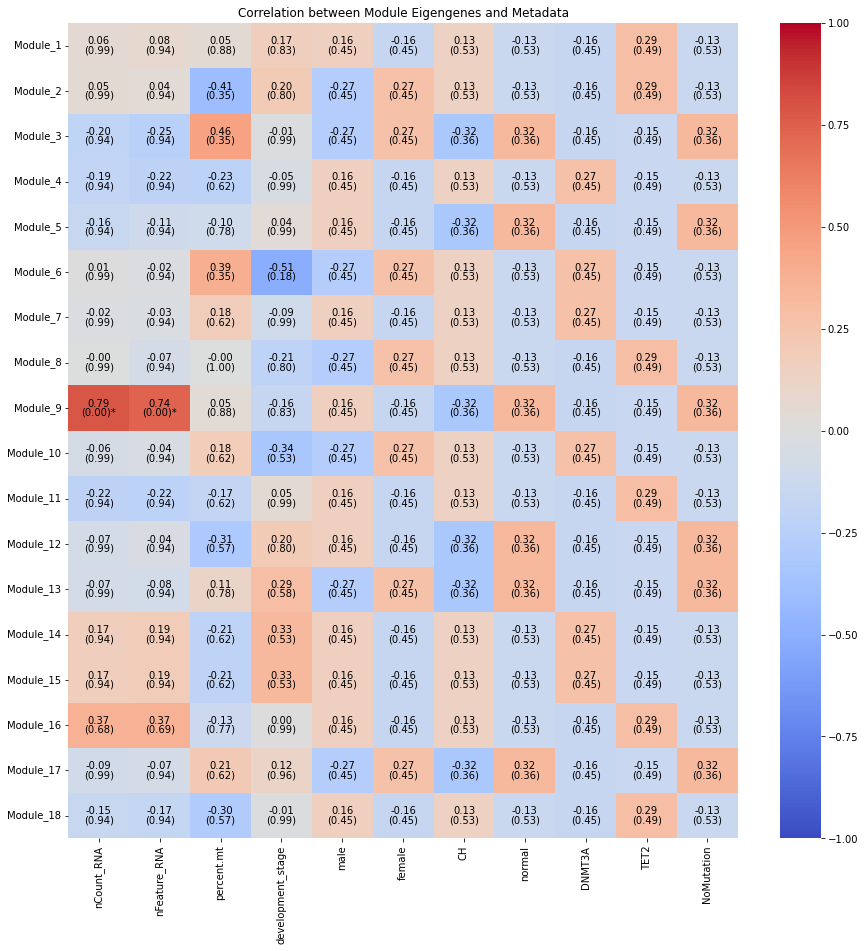

In [25]:
# Visualise the correlation matrix as a heatmap with correlation values and p-values
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation_matrix3, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Module Eigengenes and Metadata')

# Annotate heatmap with correlation values and p-values
annotate_heatmap_with_p_values(heatmap, correlation_matrix3, adjusted_p_values)

plt.show()

External Reading:

- PCA: https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186
- Heatmaps: https://www.atlassian.com/data/charts/heatmap-complete-guide#:~:text=What%20is%20a%20heatmap%3F,in%20the%20corresponding%20cell%20range.
- False Discovery Rate: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1716-1

Exercise Questions:
1. What is a correlation and why is it used in gene co-expression analysis?
2. What is the purpose of calculating module eigengenes in the context of gene expression data analysis?
3. Explain the rationale behind using PCA to calculate module eigengenes. How does PCA help in capturing the main variation in the gene expression data within a module?
4. Why are adjusted p-values used instead of p-values?
5. In the context of merging module eigengenes with clinical metadata, why might it be important to drop certain columns like 'donor_id.1', 'scType_celltype', 'tissue_type', 'cell_type', 'tissue', and 'MUTATION'?
6. What is fdr_bh and explain it fully?
7. Based on the heatmap, what can you summarise?
8. It can be important to check for missing values within the data. How would you do this? Also, if there are missing values, how would you handle them in this context?
9. Perform FDR adjustment on the p-values and compare the number of significant correlations before and after correction.
10. Plot the expression of eigengenes for a selected module against a specific metadata variable and provide an interpretation of the plot.

Answers:
1. In the context of gene co-expression analysis, correlation refers to the statistical measure of the strength and direction of association between the expression levels of two genes across a set of samples or conditions. It quantifies the degree to which the expression patterns of two genes are similar or dissimilar across different biological contexts.
2. Module eigengenes represent the overall expression profile of gene modules, summarising the main patterns of gene expression within a group of co-expressed genes. This simplifies complex gene expression data, making it easier to study associations between gene expression patterns and clinical variables.
3. PCA identifies the principal components that capture the maximum variance in the data. By taking the first principal component as the module eigengene, it provides a single vector that represents the predominant expression pattern of the genes within the module, thereby summarising the main axis of variation.
4. Adjusted p-values are used instead of raw p-values in statistical hypothesis testing to correct for multiple comparisons. When conducting multiple statistical tests simultaneously (such as testing multiple genes in gene expression analysis or multiple variables in genomics studies), the probability of obtaining false positive results increases. This increased probability arises due to the cumulative effect of conducting multiple tests, leading to an inflated Type I error rate (false positives).
5. These columns might be dropped because they are categorical variables or identifiers that do not directly relate to the continuous expression data or are not relevant for biological interpretation. Including only relevant numerical metadata ensures meaningful correlation analysis.
6. FDR_BH stands for False Discovery Rate (FDR) control using the Benjamini-Hochberg (BH) procedure. It is a statistical method used to control the proportion of false positives among all significant results when conducting multiple hypothesis tests simultaneously.
7. There are 18 modules in total. Number of counts and number of featurs appear to significantly impact module 9. Although the rest of the modules do not have significant correlations, there are still high positive correlations in terms of single cell data, with individual mutations as well as development stage. This can give an indication for which sets of genes may be impacted by those mutations or disease.

Answer 8:

In [26]:
print(datExpr.isnull().sum().sum())
print(metadata.isnull().sum().sum())

0
0


In this case there are no missing values, but if there were then it's important to calculate first how many missing values there are e.g. per gene within the expression matrix or per donor within the metadata. If there was a high proportion of missing values, then those respective rows would have to be dropped. Alternatively, missing values can also be imputed using mean/median imputation or more sophisticated techniques like K-Nearest Neighbors imputation.

Answer 9:

In [27]:
# Initialise a DataFrame to store p-values
module_p_values = pd.DataFrame(index=module_eigengenes.columns, columns=metadata2.columns)

# Calculate p-values for correlations between module eigengenes and metadata
for module in module_eigengenes.columns:
    for metadata_column in metadata2.columns:
        # Calculate correlation coefficient and p-value
        _, p_value = pearsonr(module_eigengenes[module], metadata2[metadata_column])
        # Store p-value in the DataFrame
        module_p_values.loc[module, metadata_column] = p_value

print("P-values before FDR adjustment:")
print(module_p_values)

P-values before FDR adjustment:
          nCount_RNA nFeature_RNA percent.mt development_stage      male  \
Module_1    0.793491      0.72099   0.806646          0.440304  0.450857   
Module_2    0.826566      0.85459   0.046988          0.354618  0.203374   
Module_3    0.341225     0.244609   0.023954          0.952607  0.203374   
Module_4    0.385701     0.310888   0.289457          0.833917  0.450857   
Module_5    0.469428     0.614305   0.650711          0.868287  0.450857   
Module_6    0.973395     0.935497   0.059141          0.010078  0.203374   
Module_7    0.913504     0.891046   0.401758          0.663019  0.450857   
Module_8    0.988275     0.751953   0.998581          0.331617  0.203374   
Module_9    0.000005     0.000039   0.827907          0.459441  0.450857   
Module_10   0.772535     0.851099    0.39401          0.107796  0.203374   
Module_11   0.311724     0.303027   0.415034          0.809543  0.450857   
Module_12   0.735911     0.869983   0.135952          0.

In [28]:
# Initialize a DataFrame to store adjusted p-values
adjusted_p_values = pd.DataFrame(index=module_p_values.index, columns=module_p_values.columns)

# Apply FDR correction
for column in module_p_values.columns:
    p_values = module_p_values[column].astype(float)
    _, adj_p_values, _, _ = multipletests(p_values, method='fdr_bh')
    adjusted_p_values[column] = adj_p_values

print("Adjusted p-values after FDR correction:")
print(adjusted_p_values)

Adjusted p-values after FDR correction:
           nCount_RNA  nFeature_RNA  percent.mt  development_stage      male  \
Module_1     0.988275      0.935497    0.876607           0.826994  0.450857   
Module_2     0.988275      0.935497    0.354845           0.797891  0.450857   
Module_3     0.940223      0.935497    0.354845           0.987522  0.450857   
Module_4     0.940223      0.935497    0.622551           0.987522  0.450857   
Module_5     0.940223      0.935497    0.780854           0.987522  0.450857   
Module_6     0.988275      0.935497    0.354845           0.181400  0.450857   
Module_7     0.988275      0.935497    0.622551           0.987522  0.450857   
Module_8     0.988275      0.935497    0.998581           0.797891  0.450857   
Module_9     0.000088      0.000710    0.876607           0.826994  0.450857   
Module_10    0.988275      0.935497    0.622551           0.534046  0.450857   
Module_11    0.940223      0.935497    0.622551           0.987522  0.450857   


In [29]:
# Threshold for significance
significance_threshold = 0.05

# Count significant correlations before adjustment
significant_before = (module_p_values < significance_threshold).sum().sum()
print(f"Number of significant correlations before FDR adjustment: {significant_before}")

# Count significant correlations after adjustment
significant_after = (adjusted_p_values < significance_threshold).sum().sum()
print(f"Number of significant correlations after FDR adjustment: {significant_after}")

Number of significant correlations before FDR adjustment: 5
Number of significant correlations after FDR adjustment: 2


Answer 10:

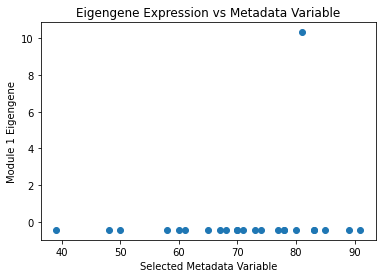

In [30]:
plt.scatter(metadata['development_stage'], module_eigengenes['Module_1'])
plt.xlabel('Selected Metadata Variable')
plt.ylabel('Module 1 Eigengene')
plt.title('Eigengene Expression vs Metadata Variable')
plt.show()

As can be seen from the scatter plot, development stage appears to have a weak relationship with Module 1 as the dots are spread out. There is also an outlier within the data. There also appears to be no apparent trend in the data. This may be due to the few numbers of samples as well as due to the sparse nature of single-cell data.